# PySketcher Reference Notebook

In [1]:
%matplotlib widget

In [2]:
from pysketcher import *

In [3]:
from ipywidgets import Dropdown,AppLayout,Output,VBox

In [4]:
from IPython.display import HTML, SVG, display, clear_output

In [5]:
selector = Dropdown(
    options=[('Circle', 1), ('Rectangle', 2), ('Line', 3)],
    value=2,
    description='Number:',
)

In [6]:
drawing_tool.set_coordinate_system(xmin=-10, xmax=10,
                                   ymin=-10, ymax=10,
                                   axis=True)

In [7]:
output = Output()
explain =  Output()
applayout = AppLayout(
    center=output,
    footer=VBox([selector,explain]),
    pane_heights=[0, 6, 1]
)
with output:
    clear_output()
    display(drawing_tool.mpl.gcf().canvas)
def selector_eventhandler(change):
    #print(change.new)
    drawing_tool.erase()
    if change.new == 1:
        circle = Circle(point(0,0),5)
        circle.draw()
        with explain:
            clear_output()
            display(f"Circle(point(0,0),5)")
    elif change.new == 2:
        L = 8
        h = 5
        p = point(-(L/2),-(h/2))
        rectangle = Rectangle(p,L,h)
        rectangle.draw()
        with explain:
            clear_output()
            display(f"L={L},h={h}, p=point(-(L/2),-(h/2)), Rectangle(p,L,h)")
    elif change.new == 3:
        A = point(-5,-5)
        B = point(5,5)
        line = Line(A,B)
        line.draw()
        with explain:
            clear_output()
            display(f"A = point(-5,-5), B = point(5,5), line = Line(A,B) ")
        
    drawing_tool.display()
        
selector.observe(selector_eventhandler, names='value')

In [8]:
applayout

AppLayout(children=(VBox(children=(Dropdown(description='Number:', index=1, options=(('Circle', 1), ('Rectangl…

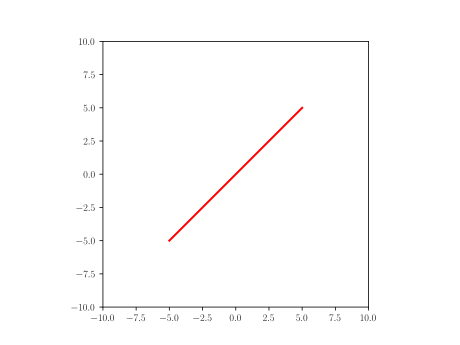

In [12]:
display(SVG(sketch2SVG()))

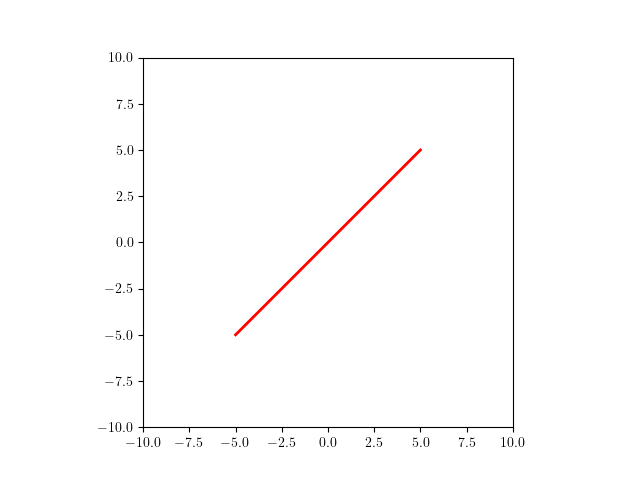

In [13]:
sketch2PNG()

In [17]:
head = """\
libraries: ["from math import tan, radians, sin, cos","from pysketcher import *"]
"""
myfig={}
sketchParse(head,myfig)

In [18]:
line="""
A: point(-5,-5)
B: point(5,5)
line: Line(A,B)
"""

In [20]:
drawing_tool.erase()
sketchParse(line,myfig)
# replace 'object' by the actual one
d = myfig['line'].draw() 
drawing_tool.display()